In [1]:
#Каггл: MaksimZulin https://www.kaggle.com/maksimzulin

#Степик: Максим Зулин https://stepik.org/users/383573832

#Score: 0.85267 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns

In [3]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
data.shape, test.shape

((5282, 20), (1761, 19))

In [5]:
data.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [6]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

По условию TotalSpent это числовой признак, но в данных у него тип object, скорее всего там есть nan. Нужно перевести его в числовой вид и заполнить пропуски.

In [8]:
data.TotalSpent = pd.to_numeric(data.TotalSpent, errors='coerce')
test.TotalSpent = pd.to_numeric(data.TotalSpent, errors='coerce')
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [9]:
data.TotalSpent.fillna(data.TotalSpent.median(), inplace=True)
test.TotalSpent.fillna(data.TotalSpent.median(), inplace=True)
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [10]:
data[num_cols].describe()

,ClientPeriod,MonthlySpending,TotalSpent
count,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2289.889086
std,24.550326,30.176464,2267.371263
min,0.000000,18.250000,18.800000
25%,9.000000,35.462500,401.587500
50%,29.000000,70.400000,1410.250000
75%,55.000000,90.050000,3795.212500
max,72.000000,118.750000,8684.800000


Колличественные признаки

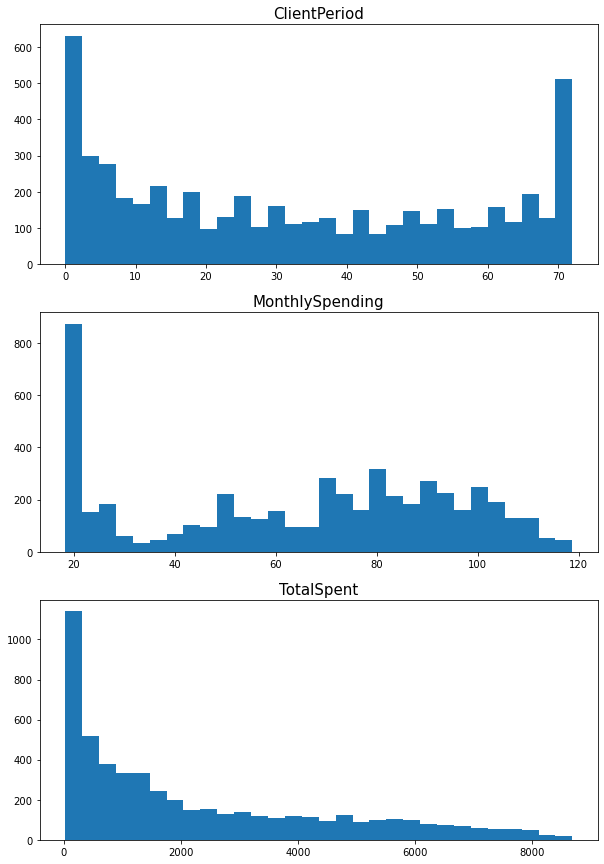

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(10,15))
for n, col in enumerate(num_cols):
    ax = ax.flatten()
    ax[n].hist(data[col], bins=30)
    ax[n].set_title(col, size=15)
plt.show()

Категориальные признаки

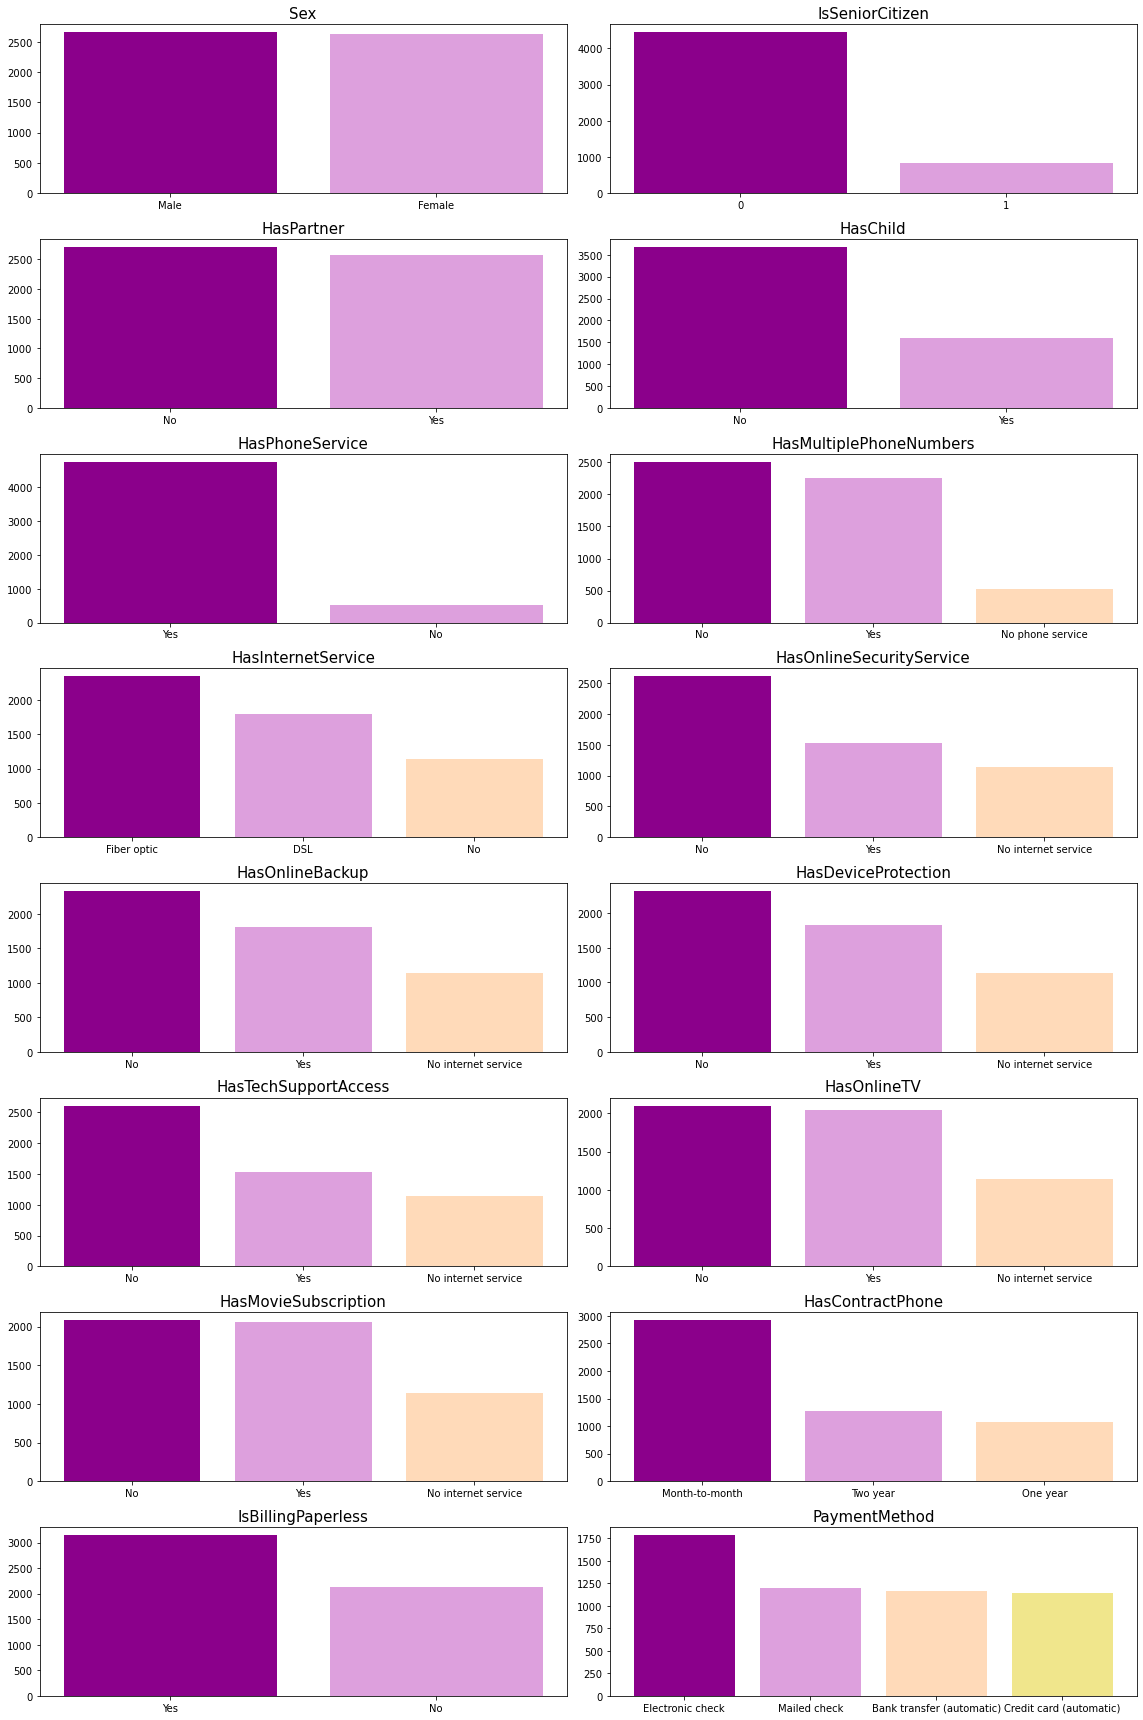

In [12]:
fig, ax = plt.subplots(8, 2, figsize=(16,24))
for n, col in enumerate(cat_cols):
    ax = ax.flatten()
    ax[n].bar(data[col].value_counts().index, data[col].value_counts().values, color=['darkmagenta', 'plum','peachpuff','khaki'])
    ax[n].set_title(col, size=15)
    ax[n].set_xticks(data[col].value_counts().index)
fig.tight_layout()
plt.show()

Быстрее и проще так

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

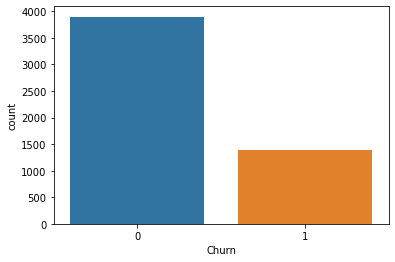

In [13]:
sns.countplot(data.Churn)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [15]:
X_train = data[num_cols + cat_cols].copy()
y_train = data[target_col].copy()
X_test = test

Пайплайн

In [16]:
prepare_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(), cat_cols)])

full_pipeline = Pipeline([
        ("preparation", prepare_pipeline),
        ("linear", LogisticRegression(solver = 'liblinear', random_state=42))])

In [17]:
C_values_lst = [1000, 100, 10, 1, 0.1, 0.01, 0.001]

param_grid = [{'linear__penalty':['l1', 'l2'],
         'linear__C':C_values_lst}]

In [18]:
grid_search = GridSearchCV(full_pipeline, 
                          param_grid, 
                          scoring='roc_auc', 
                          verbose=5)

Обучаем модель

In [19]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END linear__C=1000, linear__penalty=l1;, score=0.862 total time=   0.5s
[CV 2/5] END linear__C=1000, linear__penalty=l1;, score=0.837 total time=   0.6s
[CV 3/5] END linear__C=1000, linear__penalty=l1;, score=0.834 total time=   0.5s
[CV 4/5] END linear__C=1000, linear__penalty=l1;, score=0.856 total time=   0.6s
[CV 5/5] END linear__C=1000, linear__penalty=l1;, score=0.836 total time=   0.6s
[CV 1/5] END linear__C=1000, linear__penalty=l2;, score=0.862 total time=   0.0s
[CV 2/5] END linear__C=1000, linear__penalty=l2;, score=0.837 total time=   0.0s
[CV 3/5] END linear__C=1000, linear__penalty=l2;, score=0.834 total time=   0.0s
[CV 4/5] END linear__C=1000, linear__penalty=l2;, score=0.856 total time=   0.0s
[CV 5/5] END linear__C=1000, linear__penalty=l2;, score=0.836 total time=   0.0s
[CV 1/5] END .linear__C=100, linear__penalty=l1;, score=0.862 total time=   0.5s
[CV 2/5] END .linear__C=100, linear__penalty=l1;

GridSearchCV(estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                     

In [20]:
roc_auc_score(y_train, grid_search.predict_proba(X_train)[:, 1])

0.8489588739742033

In [21]:
grid_search.best_params_

{'linear__C': 100, 'linear__penalty': 'l1'}

In [22]:
best_pipeline = grid_search.best_estimator_
best_pipeline

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ClientPeriod',
                                                   'MonthlySpending',
                                                   'TotalSpent']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'IsSeniorCitizen',
                                                   'HasPartner', 'HasChild',
                                                   'HasPhoneService',
                                                   'HasMultiplePhoneNumbers',
                                                   'HasInternetService',
                                                   'HasOnlineSecurityService',
                                                   'HasOnlineBackup',
                                                   'HasDeviceProtection',
                 

Проверяем на лучших параметрах

In [23]:
roc_auc_score(y_train, best_pipeline.predict_proba(X_train)[:, 1])

0.8489588739742033

Градиентный бустинг

In [24]:
from catboost import CatBoostClassifier
import catboost

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data['Churn'], 
                                                       train_size=0.8, 
                                                       random_state=42)

In [26]:
cat = CatBoostClassifier(cat_features=cat_cols, random_seed=42, verbose=False)

In [27]:
cat.fit(X_train, y_train, use_best_model=True, eval_set=(X_test, y_test))

In [28]:
roc_auc_score(y_train, cat.predict_proba(X_train)[:, 1])

0.873011444178972

In [29]:
roc_auc_score(y_test, cat.predict_proba(X_test)[:, 1])

0.8284902245084549

In [30]:
y_train_predicted = cat.predict_proba(X_train)[:, 1]
y_test_predicted = cat.predict_proba(X_test)[:, 1]

In [31]:
cat = catboost.CatBoostClassifier(n_estimators=100, 
                                             cat_features=cat_cols)
cat.fit(X_train, y_train)
y_train_predicted = cat.predict_proba(X_train)[:, 1]
y_test_predicted = cat.predict_proba(X_test)[:, 1]

Learning rate set to 0.157457
0:	learn: 0.6374127	total: 32.8ms	remaining: 3.24s
1:	learn: 0.5944644	total: 62.3ms	remaining: 3.05s
2:	learn: 0.5607167	total: 93.8ms	remaining: 3.03s
3:	learn: 0.5349961	total: 123ms	remaining: 2.96s
4:	learn: 0.5155555	total: 152ms	remaining: 2.89s
5:	learn: 0.4993339	total: 179ms	remaining: 2.8s
6:	learn: 0.4849506	total: 210ms	remaining: 2.79s
7:	learn: 0.4716881	total: 237ms	remaining: 2.73s
8:	learn: 0.4603805	total: 267ms	remaining: 2.7s
9:	learn: 0.4513992	total: 296ms	remaining: 2.67s
10:	learn: 0.4441001	total: 325ms	remaining: 2.63s
11:	learn: 0.4380334	total: 354ms	remaining: 2.59s
12:	learn: 0.4324179	total: 411ms	remaining: 2.75s
13:	learn: 0.4274501	total: 454ms	remaining: 2.79s
14:	learn: 0.4224788	total: 493ms	remaining: 2.8s
15:	learn: 0.4192212	total: 523ms	remaining: 2.74s
16:	learn: 0.4157905	total: 552ms	remaining: 2.69s
17:	learn: 0.4128357	total: 581ms	remaining: 2.65s
18:	learn: 0.4100133	total: 610ms	remaining: 2.6s
19:	learn: 0

In [32]:
roc_auc_score(y_train, y_train_predicted)

0.872562408431784

In [33]:
roc_auc_score(y_test, y_test_predicted)

0.8262275930218598

Меняю параметры

In [34]:
best_model = catboost.CatBoostClassifier(n_estimators=100, 
                                         cat_features=cat_cols,
                                         learning_rate=0.157457)
best_model.fit(X_train, y_train)
y_train_predicted = cat.predict_proba(X_train)[:, 1]
y_test_predicted = cat.predict_proba(X_test)[:, 1]

0:	learn: 0.6374127	total: 23.2ms	remaining: 2.3s
1:	learn: 0.5944644	total: 47.2ms	remaining: 2.31s
2:	learn: 0.5607167	total: 74.5ms	remaining: 2.41s
3:	learn: 0.5349961	total: 114ms	remaining: 2.73s
4:	learn: 0.5155555	total: 143ms	remaining: 2.72s
5:	learn: 0.4993339	total: 168ms	remaining: 2.62s
6:	learn: 0.4849506	total: 196ms	remaining: 2.61s
7:	learn: 0.4716881	total: 224ms	remaining: 2.58s
8:	learn: 0.4603805	total: 255ms	remaining: 2.58s
9:	learn: 0.4513992	total: 285ms	remaining: 2.56s
10:	learn: 0.4441001	total: 315ms	remaining: 2.55s
11:	learn: 0.4380334	total: 346ms	remaining: 2.53s
12:	learn: 0.4324179	total: 377ms	remaining: 2.52s
13:	learn: 0.4274501	total: 406ms	remaining: 2.49s
14:	learn: 0.4224788	total: 441ms	remaining: 2.5s
15:	learn: 0.4192212	total: 474ms	remaining: 2.49s
16:	learn: 0.4157905	total: 510ms	remaining: 2.49s
17:	learn: 0.4128357	total: 547ms	remaining: 2.49s
18:	learn: 0.4100133	total: 579ms	remaining: 2.47s
19:	learn: 0.4075918	total: 612ms	remain

In [35]:
best_model = best_model

In [36]:
X_test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')
submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('my_submission.csv', index=False)

Score: 0.85267 на каггле